## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [6]:
import os
import keras
import itertools
from keras.layers import Dropout
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, num_neurons, drp_ratio, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LAYERS = [[512, 256, 128],[512, 256, 128, 64]]
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75]

In [7]:
results = {}
for num_layer in LAYERS:
    for dropout_ratio in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("%s layers and %.2f dropout" % (len(num_layer), dropout_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_layer, drp_ratio=dropout_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "%s layers and %s dropout" % (len(num_layer), str(dropout_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


3 layers and 0.25 dropout
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_____________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3333 - acc: 0.5216 - val_loss: 1.3287 - val_acc: 0.5249
Epoch 44/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3264 - acc: 0.5269 - val_loss: 1.3308 - val_acc: 0.5277
Epoch 45/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3169 - acc: 0.5305 - val_loss: 1.3262 - val_acc: 0.5282
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3096 - acc: 0.5317 - val_loss: 1.3251 - val_acc: 0.5256
Epoch 47/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3085 - acc: 0.5319 - val_loss: 1.3236 - val_acc: 0.5229
Epoch 48/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3051 - acc: 0.5333 - val_loss: 1.3341 - val_acc: 0.5165
Epoch 49/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2975 - acc: 0.5366 - val_loss: 1.3181 - val_acc: 0.5285
Epoch 50/50
50000/50000 [==

50000/50000 [==============================] - 6s 114us/step - loss: 2.0718 - acc: 0.1984 - val_loss: 2.1807 - val_acc: 0.1679
Epoch 40/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.0707 - acc: 0.1967 - val_loss: 2.1804 - val_acc: 0.1665
Epoch 41/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.0628 - acc: 0.1970 - val_loss: 2.1641 - val_acc: 0.1688
Epoch 42/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.0600 - acc: 0.1976 - val_loss: 2.1950 - val_acc: 0.1598
Epoch 43/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.0600 - acc: 0.1981 - val_loss: 2.1868 - val_acc: 0.1660
Epoch 44/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.0578 - acc: 0.1984 - val_loss: 2.2072 - val_acc: 0.1549
Epoch 45/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.0509 - acc: 0.2012 - val_loss: 2.1967 - val_acc: 0.1609
Epoch 46/50
50000/50000 [==============

50000/50000 [==============================] - 6s 116us/step - loss: 1.8729 - acc: 0.2914 - val_loss: 1.7625 - val_acc: 0.3511
Epoch 32/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8637 - acc: 0.2992 - val_loss: 1.7561 - val_acc: 0.3467
Epoch 33/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8610 - acc: 0.3018 - val_loss: 1.7643 - val_acc: 0.3484
Epoch 34/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8535 - acc: 0.3044 - val_loss: 1.7424 - val_acc: 0.3562
Epoch 35/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8493 - acc: 0.3057 - val_loss: 1.7316 - val_acc: 0.3649
Epoch 36/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8424 - acc: 0.3101 - val_loss: 1.7341 - val_acc: 0.3634
Epoch 37/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8387 - acc: 0.3092 - val_loss: 1.7215 - val_acc: 0.3605
Epoch 38/50
50000/50000 [==============

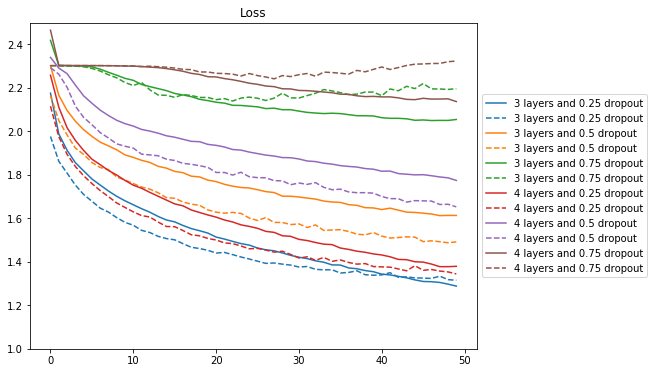

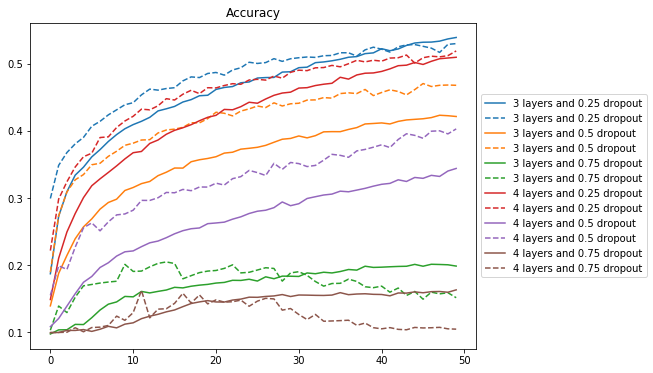

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([1, 2.5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
